In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [68]:
data = pd.read_csv("spy dal 2022.csv", sep=",", parse_dates=True, index_col=0)


In [69]:
data["returns"] = data["close"].pct_change()
data["volatility"] = data["returns"].rolling(60).std()
data["momentum"] = data["close"].pct_change(60)
data["target"] = (data["returns"].shift(-1) > 0.00020887146746129126).astype(int)

data.dropna(inplace=True)

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = ["open", "close", "high", "low", "volume"]

data[features] = scaler.fit_transform(data[features])


In [71]:
X = data[[ "returns", "close", "volume", "volatility", "momentum"]]

### Choosing the ideal number of PCA

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=X.shape[1])
pca.fit(X)

X_pca = pca.transform(X)


explained_variance_ratio = pca.explained_variance_ratio_
print(pca.explained_variance_ratio_)

explained_variance = pca.explained_variance_
print(pca.explained_variance_)

[7.24800907e-01 2.75189776e-01 9.13958187e-06 1.50545778e-07
 2.68667361e-08]
[1.44962139e+00 5.50386986e-01 1.82794106e-05 3.01095622e-07
 5.37341980e-08]


In [73]:
PCA_numbers = np.arange(pca.n_components_) + 1

PCA_numbers

array([1, 2, 3, 4, 5])

### Two ways of visualising variance of PCAs

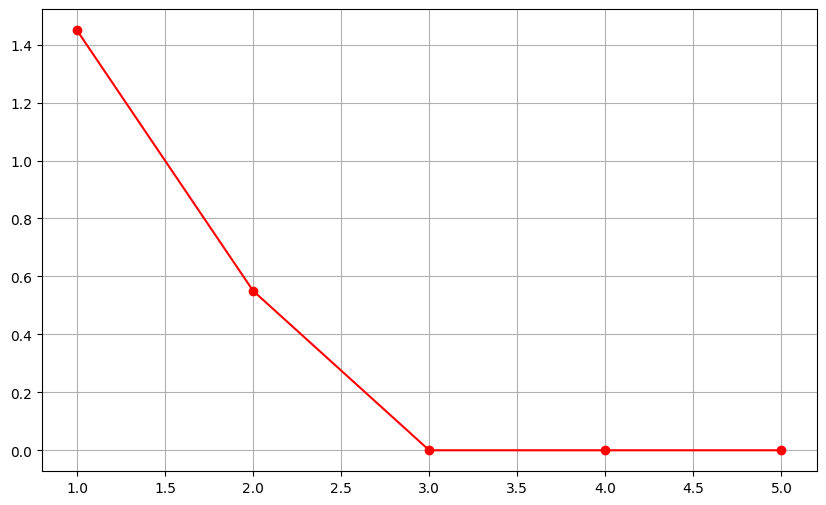

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(PCA_numbers, explained_variance, marker="o", color="red")
plt.grid()

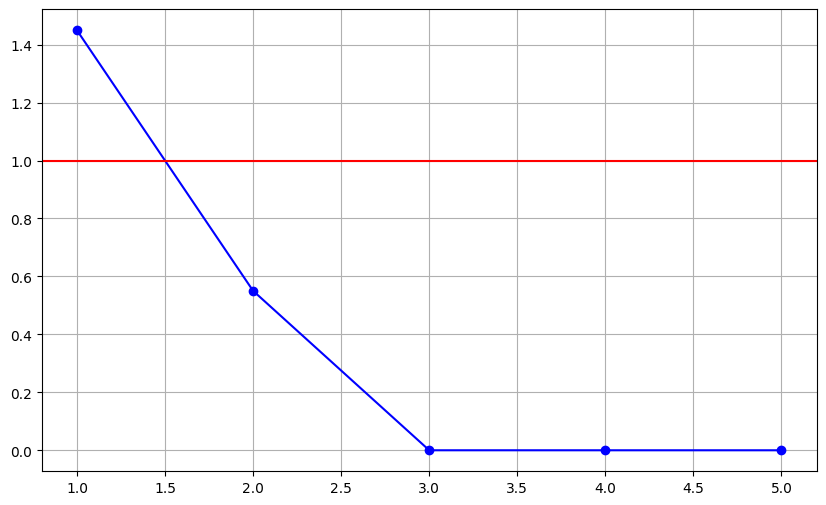

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(PCA_numbers, explained_variance, marker="o", color="blue")
plt.axhline(y = 1, color = 'r', linestyle = '-')
plt.grid()

### PCA

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

##### Biplot

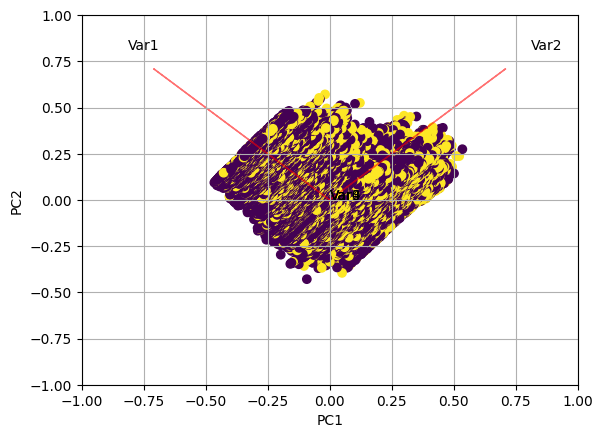

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Calcola i punteggi per i primi due componenti principali
xs = X_pca[:,0]
ys = X_pca[:,1]

# Calcola le scale per i dati
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

# Crea un grafico scatter per i componenti principali
plt.scatter(xs * scalex, ys * scaley,
            c = data["target"], 
            cmap='viridis',)

# Calcola i loadings per i componenti principali
loadings = np.transpose(pca.components_[0:2, :])
n = loadings.shape[0]

# Disegna i vettori dei loadings
for i in range(n):
    plt.arrow(0, 0, loadings[i,0], loadings[i,1], color='r', alpha=0.5)
    plt.text(loadings[i,0]* 1.15, loadings[i,1] * 1.15, "Var"+str(i), color='black')

# Imposta i limiti e le etichette degli assi
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

# Mostra il grafico
plt.show()